In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import te

In [ ]:
!pip install mymodule

  Preparing metadata (setup.py) ... done
  Created wheel for mymodule: filename=myModule-1.0.0-py3-none-any.whl size=1413 sha256=8f8dcc89c385e9e418ba1314b5a642fbe1a8a2c35b38c6ad3f39ba3e1c14cb21
  Stored in directory: /root/.cache/pip/wheels/f4/64/ed/4ac2e7514f3e85b8aea309dff4c236817b10c4d0809e5511d8
Successfully built mymodule


In [ ]:
keras.__version__

'2.12.0'

In [ ]:
Train_data_dir ="/content/drive/MyDrive/horse-or-human/train"
Valid_data_dir ="/content/drive/MyDrive/horse-or-human/validation"


In [ ]:
Pred_model =ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode="nearest")

In [ ]:
Train_Picture=Pred_model.flow_from_directory(Train_data_dir,
                               target_size=(150,150),
                               color_mode="rgb",
                               batch_size=42,
                               class_mode="binary")

Found 1027 images belonging to 2 classes.


In [ ]:
Model_Result=ImageDataGenerator(rescale=1./255)

In [ ]:
valid_model=Model_Result.flow_from_directory(Valid_data_dir,
                                             target_size=(150,150),
                                             color_mode="rgb",
                                             batch_size=42,
                                             class_mode="binary")

Found 256 images belonging to 2 classes.


In [ ]:
def plotImges(image_arr):
  fig , axes =plt.subplots(1,5, figsize=(20,20))
  axes =axes.flatten()
  for img, ax in zip(image_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


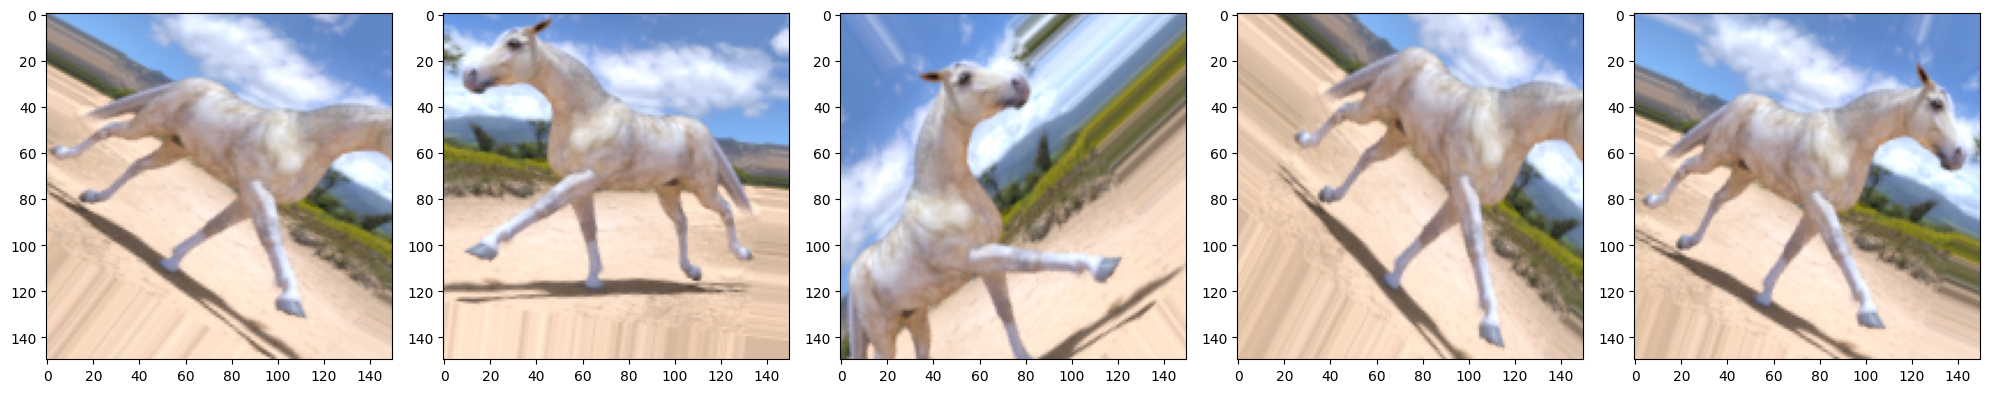

In [ ]:
images = [Train_Picture[0][0][0] for i in range(5)]
plotImges(images)


In [ ]:
My_model =keras.models.Sequential([
                                  keras.layers.Conv2D(filters=32 , kernel_size=4 , input_shape=[150 , 150, 3]),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                  keras.layers.Conv2D(filters=64 , kernel_size =3),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                  keras.layers.Conv2D(filters=128 , kernel_size =3),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                  keras.layers.Conv2D(filters=256 , kernel_size =3),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                  keras.layers.Conv2D(filters=512 , kernel_size =3),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),


                                  keras.layers.Dropout(0.5),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(units=128 ,activation="relu"),
                                  keras.layers.Dropout(0.1),
                                  keras.layers.Dense(units=256 , activation = "relu"),
                                  keras.layers.Dropout(0.25),
                                  keras.layers.Dense(units=2, activation="softmax")])

In [ ]:
My_model.compile(optimizer=Adam(lr=0.0001) , loss="sparse_categorical_crossentropy", metrics=["accuracy"])
My_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 147, 147, 32)      1568      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 33, 33, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 128)     

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
Model_path ="D:\Deep_learning_project/human_horse_predictor.h5"

chekepoints =ModelCheckpoint(Model_path , monitor="val_accuracy" , verbose=1, save_best_only =True , mode="max")
callback_list =[chekepoints]

In [ ]:
First_dl = My_model.fit(Train_Picture,
                        epochs=30,
                        verbose=1,
                        batch_size=32,
                        validation_data=valid_model,
                        callbacks=callback_list)

Epoch 1/30
25/25 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.5141
Epoch 1: val_accuracy improved from -inf to 0.57031, saving model to D:\Deep_learning_project/human_horse_predictor.h5
25/25 [==============================] - 371s 15s/step - loss: 0.6947 - accuracy: 0.5141 - val_loss: 0.6552 - val_accuracy: 0.5703
Epoch 2/30
25/25 [==============================] - ETA: 0s - loss: 0.6708 - accuracy: 0.5677
Epoch 2: val_accuracy improved from 0.57031 to 0.81250, saving model to D:\Deep_learning_project/human_horse_predictor.h5
25/25 [==============================] - 15s 602ms/step - loss: 0.6708 - accuracy: 0.5677 - val_loss: 0.5786 - val_accuracy: 0.8125
Epoch 3/30
25/25 [==============================] - ETA: 0s - loss: 0.6002 - accuracy: 0.6777
Epoch 3: val_accuracy improved from 0.81250 to 0.83203, saving model to D:\Deep_learning_project/human_horse_predictor.h5
25/25 [==============================] - 15s 597ms/step - loss: 0.6002 - accuracy: 0.6777 - 

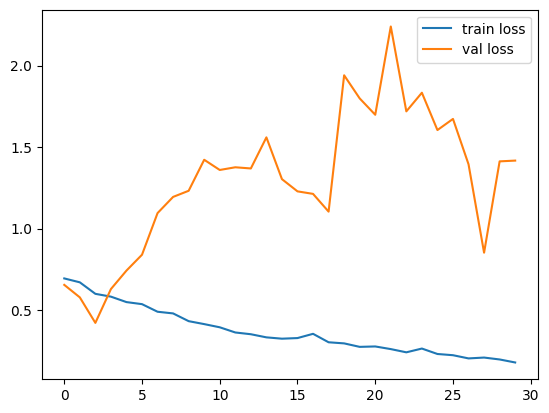

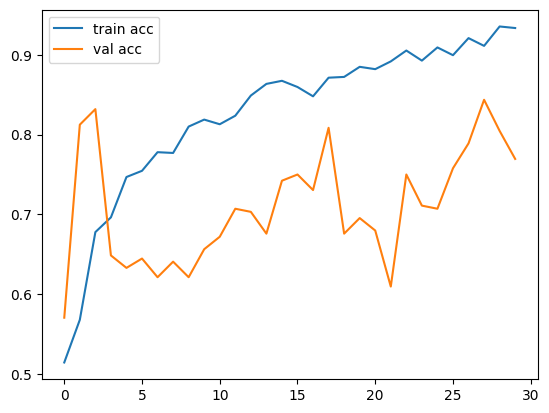

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(First_dl.history['loss'], label='train loss')
plt.plot(First_dl.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss')

# plot the accuracy
plt.plot(First_dl.history['accuracy'], label='train acc')
plt.plot(First_dl.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/horse-or-human/validation/humans/valhuman03-07.png")
image_resize=cv2.resize(image,(150,150))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)
#plt.imshow(image)

(1, 150, 150, 3)


7/7 [==============================] - 1s 160ms/step


<Axes: >

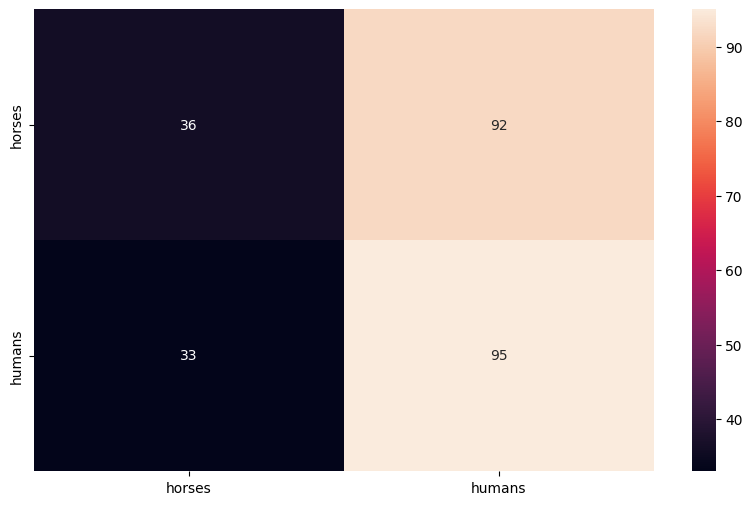

In [ ]:
from sklearn.metrics import confusion_matrix
# Generate predictions using the trained model on the test data
y_pred = My_model.predict(valid_model)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = valid_model.classes

# Get the class labels
class_labels = list(valid_model.class_indices.keys())

plt.figure(figsize=(10,6))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_true_labels, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)


In [ ]:
from sklearn.metrics import classification_report
y_pred = My_model.predict(valid_model)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = valid_model.classes

# Get the class labels
class_labels = list(valid_model.class_indices.keys())

# Compute the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_labels)

# Print the classification report
print(report)


7/7 [==============================] - 1s 180ms/step
              precision    recall  f1-score   support

      horses       0.51      0.27      0.36       128
      humans       0.50      0.73      0.60       128

    accuracy                           0.50       256
   macro avg       0.50      0.50      0.48       256
weighted avg       0.50      0.50      0.48       256



In [ ]:
pred=My_model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[0. 1.]]


In [ ]:
output_class=[np.argmax(pred)]
print("the predict class is output class", output_class)

the predict class is output class [1]


In [ ]:
Model = Sequential()
My_model=tf.keras.applications.MobileNetV2(
    input_shape=(256,256),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling="avg",
    classes=2,
    classifier_activation="sigmoid"
)

ValueError: ignored